
# MALIS Lab Session 2 - Fall 2020
## Due Date: November 16 23h59

**Group :**

**Aydin ABIAR**

**Fatemeh CHANGIZIAN**

The aim of this lab is to practice with Neural Networks (Multi-Layer Perceptrons) via simple classification experiments and the implementation of the feedforward and backpropagation procedures.

#### Learning goals
After this lab, you should be able to:
1. Be familiar with the elements required to define the architecture of a neural network (NN).
2. Understand the two procedures needed to train a neural network: feedforward and backpropagation
3. Understand the role of the learning rate and the number of iterations in the training process of a NN and how it these can affect performance.

#### Instructions:
Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. We strongly encourage the addition of plots and visual representation to the report, bearing in mind that comments on the graphical data are still necessary. Code for adding images to your notebook: ```<img src="path/to/image.png" />```. <Plateforme soumission des notebooks>

<h2>Introduction</h2>
There are three parts to this lab session. 

1. A "theoretical" part: Given a set of training examples you have to decide on the architecture of the feed-forward neural network such as; number of layers, number of neuron per layers and finally the values of the weights. 

2. A "programming" part: Given the skeleton of the Python code of an MLP simulator, implement the missing functions (feedforward and backpropagation procedures). 

3. An "experimental" part: Having completed the implementation of the MLP simulator, the final step consist on training the network and testing it.

<h2>Part 1: Design a neural network</h2>
The aim of this part is to get a better understanding of the basics of Neural Networks construction. A number of sample points on a 128 by 128 grid have been assigned one out of three colors (red, green or blue). You should build a Neural Network with two inputs and three outputs which provides the exact coloring for these points. The problem can be visualized in the following figure: 

<img src="data_set.jpg" />

The file set30.x1x2rgb (in .\data\) contains the data corresponding to the problem defined above. The visual representation of the problem (above figure) is stored in data_set.jpg.

The problem:

Pairs of x1 and x2 coordinates (both ranging between 0 and 127) are associated with a specific color: 

* Red: output 1 0 0, 
* Green: output 0 1 0, 
* Blue: output 0 0 1. 

**Question :** How many linear separations would be needed to perfectly separate the data points? Using the visual representation, give some appropriate equations of such linear separations.

**Answer :**  We would need 2 linear separations. 
A first separation between the group {red} and {green, blue} with the equation 5x1 + 8x2 - 5 = 0

A second separations between {green} and {blue} (to differentiate between the previous elements inside {green, blue}) with the equation -23x + 17y + 345 = 0

The objective of the network is to correctly determine for any given (x1, x2) coordinate pair the corresponding color. 
Using the equations you proposed before, along with your lectures knowledge, your task is to <b>manually define a Neural Network which performs this task perfectly</b>. There is no need for programming or iterative training. The transfer function is assumed to be the step function: 

$f(t) = (t > 0)$ (it is equal to 1 if t is positive, 0 otherwise). 

Of course, it is your task to define the number of layers, the number of neurons per layer, and the exact values for the weights. 

<i>Hint: We may remember the XOR problem and how it was solved. Think also how many lines you need to create areas with only elements of that color and if the color is below or above that color.</i>

### Your answer :

( *Fill in the correct data and fill the respective weigths and biases* )

#### Test with the data
Test with the data in ./data/set30.x1x2rgb, complete the code below with your values

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
print_solutions=False

In [2]:
rgb_df=pd.read_csv('colors.csv')

x=np.array(rgb_df[['x1','x2']].copy())
y=np.array(rgb_df[['y1','y2','y3']].copy())

######################### YOUR VALUES HERE ####################

# weight input -> 1st hidden layer
W_1 =np.array([[14, 23], # to n1 of first hidden layer
      [-23, 17] # to n2 of first hidden layer
      ])
# bias 1st hidden layer
b_1 = np.array([-1860, 345]).T 

# 1st hidden layer -> output layer
W_out =np.array([[-1, 0], # to n1 of first hidden layer
      [1, 1], # to n2 of first hidden layer
      [1, -1]])
b_out = np.array([0.5, -1.5, -0.5]).T 


x1 = (b_1 + x @ W_1.T)>0 # @ is the matrix product
y_hat = (b_out + x1 @ W_out.T)>0

######################### END YOUR VALUES ######################

# You should get 100 %
print('accuracy : ' , 100*np.sum(y_hat==y)/(3*len(y)),'%')



accuracy :  100.0 %


In [3]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/part1.py

## Part 2: Implementation of a Neural Network / Multi-Layer Perceptrons

In order to implement a neural network, firstly we have to implement the basic blocks, then combine them.

1. **Initialization of parameters**
    1. need as parameters the number of neurons in input, hidden layer1, hidden layer2, ..., output
    2. random initialization of the parameters
2. **Activation functions**
    1. define the function sigmoid and sigmoid_derivative
2. **Forward function**
    1. using inputs, weights, activation functions compute y_hat
3. **Loss function**
    1. given as input the true y and y_hat, compute the loss
4. **Accuracy**
    1. given as input the true y and y_hat, compute the accuracy
5. **Backward function**
    1. gradient computations from last layer to first layer
    2. update of parameters (weights,...)
6. **Training**
    1. needs as parameters the inputs and corresponding outputs,the learning rate, the number of epochs and the parameter verbose
    2. repeat for the number of epochs:
        1. shuffle the inputs
        2. for each input : forward, loss, backward
        3. loss and save it and if verbose==True print it
        4. accuracy and save it and if verbose==True print it


Give a look to the file **NeuralNetwork.py** and then return to the notebook to implement the missing functions

In [4]:
import numpy as np
from scipy.stats import logistic
# from the file NeuralNetwork.py we import the Multi-Layer Perceptron
from NeuralNetwork import MLP

**2. Activation functions**

In MLP there is the function sigmoid. Using MPL.sigmoid(), implement its derivative function

In [5]:
def d_sigmoid(a) :
    '''
    Derivative of sigmoid activation function. It can work with single inputs or vectors or matrices.
    Return the sigmoid derivative of a
    '''
    ################# YOUR CODE HERE ####################
    
    if np.isscalar(a) : # If a is a scalar then we just calculate normally
        sig = MLP.sigmoid(a)
        d_sig = sig*(1-sig)
        a = d_sig
    
    else : # If a is a numpy list or array    
        # I used the numpy.nditer to modify a whether it is a numpy list or array
        # https://numpy.org/doc/stable/reference/arrays.nditer.html Section " Modifying Array values"
        with np.nditer(a, op_flags=['readwrite']) as it: # We iterate through every element of the list / array
            for element in it : 
                sig = MLP.sigmoid(element) # Sigmoid of the element
                d_sig = sig*(1-sig) # Derivative sigmoid of the element using the sigmoid properties
                element[...] = d_sig # We modify the element
        
    return a
    
    ################ END OF YOUR CODE HERE ##############
    
MLP.d_sigmoid=d_sigmoid

In [6]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/d_sigmoid.py

**3. Feedforward function**

Write a function which performs the forward operation from input to output layer. Remember you have len(self.layers) number of layers and each layer has its own parameters:
1. self.layer[0].W are the weights between input and 1st hidden layer
2. self.layer[0].b are the biases of the 1st hidden layer
3. ...

Each layer has as activation function the sigmoid function

In [7]:
def forward(self, x) :
    '''
    Forward function. From input layer to output layer. Input can handle 1D or 2D inputs.

    INPUTS:
    - x : numpy array of size NxD, where N is the number of samples, D is the number of input dimensions referred as n_input before

    OUTPUTS:
    - y_hat : numpy array of size NxC, where C is the number of classes
    '''
    ################# YOUR CODE HERE ####################
    
######### Please note that I am using the notation of the online chapter you give further
######### This means : self.layer[l].z in the weighted input vector of the layer l
#########              self.layer[l].a = MLP.sigmoid(z) is the output vector of the layer l
    L = len(self.layer) # Number of layers
    z = x # Initialisation : "output" of the first layer, l = 0, are the inputs
    for i in range(L) :
        z = self.layer[i].b + z @ self.layer[i].W.T # Computing the weighted input for each layer
        self.layer[i].z = z
        a = MLP.sigmoid(z) # Computing the output for each layer
        self.layer[i].a = a 
        z=a # The weighted input of the next layer is the output of the current layer
        
    y_hat = self.layer[L-1].z # The last output is y_hat 
    
    ################ END OF YOUR CODE HERE ##############

    return y_hat

MLP.forward=forward

In [8]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/forward.py

**4. Loss function**

Compute the mean square loss between y_hat and y
$$L = \frac{1}{N}\sum_{n=0}^{N-1} \left(\frac{1}{2} \sum_{k=0}^{C-1} (\hat{y}_{k,n} - y_{k,n})^2\right)$$
with $k$ be the class, and $n$ the sample

In [9]:
def loss(y_hat, y) :
    '''
    Compute the loss between y_hat and y! they can be 1D or 2D arrays!

    INPUTS:
    - y_hat : numpy array of size NxC, N number of samples, C number of classes. It contains the estimated values of y
    - y : numpy array of size NxC with one 1 in each row, corresponding to the correct class for that sample

    OUTPUTS:
    - L : MSE loss
    '''
    ################# YOUR CODE HERE ####################

    N = len(y) # Number of samples
    C = len(y[0]) # Number of classes
    
    L = 0
    for n in range(N) :
        for k in range(C) :
            L += 0.5*(y_hat[n][k] - y[n][k])**2
    L /= N
    ################ END OF YOUR CODE HERE ##############

    return L

MLP.loss=loss

In [10]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/loss.py

**5. Accuracy**

Compute the accuracy counting how many y_hat are equal to y over the total number of N samples. Remember the accuracy is a value in [0,1]

In [11]:
def accuracy(y_hat,y) :
    '''
    Compute the accuracy between y_hat and y

    INPUTS:
    - y_hat : numpy array of size NxC, C number of classes. It contains the estimated values of y
    - y : numpy array of size NxC with correct values of y

    OUTPUTS:
    - acc : the accuracy value between 0 and 1
    '''
    ################# YOUR CODE HERE ####################

    N = len(y) # Number of samples
    C = len(y[0]) # Number of classes
    correct_samples = 0 # Number of correct samples initialised to 0 
    for n in range(N) : # We iterate for each samples
        # We check with a boolean correct_classes if each class is correctly predicted
        correct_classes = True
        for c in range(C) :
            if y_hat[n][c] >= 0.5 and y[n][c] == 0 :
                correct_classes = False
            elif y_hat[n][c] < 0.5 and y[n][c] == 1 :
                correct_classes = False
        # Therefore , correct_classes is True if every predicted class is > 0.5 or < 0.5 respectively with the correct class being 1 or 0
        if correct_classes :
            correct_samples += 1 # We count every correct samples
    
    acc = correct_samples / N # Accuracy
    return acc

    ################ END OF YOUR CODE HERE ##############


MLP.accuracy=accuracy

In [12]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/accuracy.py

**6. Backpropagation**

You can perform it in 2 ways. The first neuron by neuron as done during the lecture, or you can use matrices as explained here. The result are equivalent. A full matrix derivation can be found here http://neuralnetworksanddeeplearning.com/chap2.html

$$\frac{\partial L}{\partial z^L}=\frac{\partial L}{\partial \hat{y}}=\delta_L=\hat{y}-y=z^L-y$$

**Important** : $\hat{y}$ and $y$ are row vectors 1$\times$C, with C the number of classes, while $a$, $z$ and $b$ are row vectors too in this notation. So are the derivatives w.r.t. them. $W^l$ is instead a matrix $n^l \times n^{l-1}$, where $n^l$ is the number of neurons at layer $l$, while  $n^{l-1}$ is the number of neurons at layer $l-1$

**Generic layer $l$**

$$\frac{\partial L}{\partial z^l}=\delta_l=\frac{\partial L}{\partial a^{l+1}}\ W^{l+1}$$

$$\frac{\partial L}{\partial a^l}=\delta_l \odot \sigma'(a^l)$$

$\odot$ is the Hadamard product or elementwise multiplication

$$\frac{\partial L}{\partial b^l}=\frac{\partial L}{\partial a^l}$$

$$\frac{\partial L}{\partial W^l}=\left(\frac{\partial L}{\partial a^l}\right)^T\ (z^{l-1})$$

with $z^{-1}$, the z at layer -1 is $x$ the input vector of size 1$\times$D, where D is the number of features

After all computations, remember to compute the update of the gradients using the learning rate $\eta$

$$W^l_{new}=W^l-\eta \frac{\partial L}{\partial W^l}$$

$$b^l_{new}=b^l-\eta \frac{\partial L}{\partial b^l}$$









In [13]:
def backpropagation(self,x,y,y_hat,learning_rate) :
    '''
    Backpropagate the error from last layer to input layer and then update the parameters

    INPUTS:
    - y_hat : numpy array of size NxC, C number of classes. It contains the estimated values of y
    -y : numpy array of size NxC with correct values of y

    OUTPUTS: (compute the error at the different levels and for each layer)
    - d_a
    - d_z
    - delta_L
    - delta_l
    - d_W
    - d_b
    '''
# compute gradients

    ################# YOUR CODE HERE ####################

######### I WILL FOLLOW THE ONLINE CHAPTER NOTATION ##########
######### z_l is the weighted input vector of the layer l
######### a_l = MLP.sigmoid(z_l) is the output vector of layer l with a_L being by definition y_hat (a_l_k is its k'th element)
######### grad_L_da_l or grad_L_dw_l or grad_L_db_l are the cost gradient relative to the output vector 
#########                                           or the weight vectors or the biases vector of the layer l
######### d_sig_z_l is the sigmoid derivative vector applied to the vector z_l
######### delta_l is the output error vector of the layer l (delta_l_j is its j'th element)
######### The used equation are :
######### (BP1) : delta_L = grad_L_da_L * d_sig_z_L 
######### (BP2) : delta_l = w_above_l.T @ delta_above_l * d_sig_z_l with w_above_l and delta_above_l 
#########                                                           the weight vectors and the output error vector 
#########                                                           of the layer above l (=l+1)
######### (BP3) : grad_L_b_l = delta_l
######### (BP4) : grad_L_w_jk = a_below_l_k * delta_l_j     with grad_l_w_jk the grad_L_w element of the j'th line and k'th column
#########                                                   and a_below_l_k the k'th element of the output vector of the layer l-1


    L = len(self.layer) # Number of layers
    
    ## STEP 1 INITIALISATION : Computing the output error vector delta_L using (BP1) equation
    ## (BP1) : delta_L = grad_L_da_L * d_sig_z_L
    ## Then we will compute the cost gradient relative to the bias and the weight of the last layer
    
    ### The output vector a_L is y_hat :
    a_L = y_hat # = self.layer[L-1].a
    
    ### Computing the cost function derivative relative to a_L
    grad_L_da_L = a_L - y # we derive a norm function
    
    ### Retrieving the vector d_sigmoid(z_L)
    d_sig_z_L = MLP.d_sigmoid(self.layer[L-1].z)
    
    ### Computing the output error delta_L
    delta_L = grad_L_da_L * d_sig_z_L  
    
    ### Computing the cost gradient relative to the bias 
    grad_L_b_L = delta_L # By (BP3) 
    self.layer[L-1].d_b = grad_L_b_L
    
    ### Retrieving the ouput vector of the layer below
    a_below_L = self.layer[L-2].a
        
    ### Computing the gradient of the cost relative to the weights of the layer l    
    grad_L_w_L = delta_L.T @ a_below_L # By (BP4)
    self.layer[L-1].d_W = grad_L_w_L
            
    ## STEP 2 BACKPROPAGATION : We calculate for each layer, starting from the last layer, the gradient of the cost relative to the biases and the wheights

    delta_above_l = delta_L # We initialise for the loop below
    
    for i in range(L-1) : # We iterate through the layers
        
        l = L-2-i # We work on the layer l starting from the penultimate layer        
        
        if l != 0 :  # We deal with the the first hidden layer later because its cost gradient relative to the weight is defined from x and not the activation 
        ### First, we compute the error vector delta_l of the layer l using (BP2)
        #### (BP2) : delta_l = w_above_l.T @ delta_above_l * d_sig_z_l

        #### Retrieving the weights w_above_l ( = w_l+1)
            w_above_l = self.layer[l+1].W # w_l+1

        #### Computing the vector d_sig_z_l
            d_sig_z_l = MLP.d_sigmoid(self.layer[l].z)

        #### Computing the error vector delta_l
            delta_l = (delta_above_l @ w_above_l)*d_sig_z_l

        ### Then, we compute the cost gradient relative to the biases and the weights using (BP3) and (BP4)
        ### (BP3) : d_L_b_l = delta_l
        ### (BP4) : d_L_w_jk = a_below_l_k * delta_l_j

        #### Computing the gradient of the cost relative to the biases of the layer l
            grad_L_b_l = np.array(delta_l) # By (BP3)
            self.layer[i].d_b = grad_L_b_l

        #### Retrieving the output vector of the layer l-1
            a_below_l = self.layer[l-1].a

        #### Computing the gradient of the cost relative to the weights of the layer l
            # Note that grad_L_w_l_jk = a_below_l[k] * delta_l[j] by (BP4) equation
            grad_L_w_l = np.array([[a_below_l[k] * delta_l[j] for k in range(len(a_below_l))] for j in range(len(delta_l))]) # By (BP4)
            self.layer[i].d_W = grad_L_w_l

        ### Restarting the next loop for the layer l-1
            delta_above_l = delta_l 
    
    
    ## STEP 3 the first layer : We deal with the first layer specially because we compute the cost gradient relative to the weights
    ##                          with x and not with a z_l variable as it was for the intermediate layers
    
    delta_1 = delta_above_l # At the end of the for loop above, delta_1 the output error of the first layer is by construction delta_above_l
    d_sig_z_0 = MLP.d_sigmoid(self.layer[0].z) # The weighted input of the first layer
    delta_0 = (delta_1 @ self.layer[1].W)*d_sig_z_0 # By (BP2)
    grad_L_b_0 = np.array(delta_0) # By (BP3)
    self.layer[0].d_b = grad_L_b_0
    
    grad_L_w_0 = delta_0.T @ x # By (BP4) but we use x there
    self.layer[0].d_W = grad_L_w_0

    
    
    ################ END OF YOUR CODE HERE ##############

# apply gradients
    # just one for loop passing through all layers is sufficient
    # apply the gradients only to self.layer[i].b and self.layer[i].W

    ################# YOUR CODE HERE ####################

    for i in range(L) :
        self.layer[i].b = self.layer[i].b - learning_rate * self.layer[i].d_b
        self.layer[i].W = self.layer[i].W - learning_rate * self.layer[i].d_W
    
    ################ END OF YOUR CODE HERE ##############
    
MLP.backpropagation=backpropagation
 

In [14]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/backpropagation.py

<h2>Part 3: Training and Recall experiments</h2>

Train the network using the iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)
* 4 features for every input
* 3 possible labels


In [15]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()

shuffle=np.random.permutation(range(len(iris.data)))
X = np.array(iris.data)[shuffle,:]
y = np.eye(3)[iris.target,:]
y=y[shuffle,:]

x_train=X[0:120,:]
y_train=y[0:120,:]
x_test=X[120:,:]
y_test=y[120:,:]



TRAINING
Epoch 0 : loss = 3.48462e-01, accuracy = 0.00 %
Epoch 10 : loss = 3.01048e-01, accuracy = 0.00 %
Epoch 20 : loss = 2.46486e-01, accuracy = 31.67 %
Epoch 30 : loss = 1.92024e-01, accuracy = 50.00 %
Epoch 40 : loss = 1.68799e-01, accuracy = 67.50 %
final : loss = 1.638e-01 , accuracy = 68.33 %

TEST
loss = 2.046e-01 , accuracy = 60.00 %



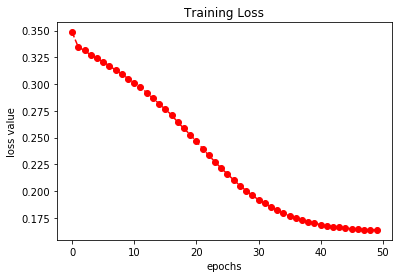

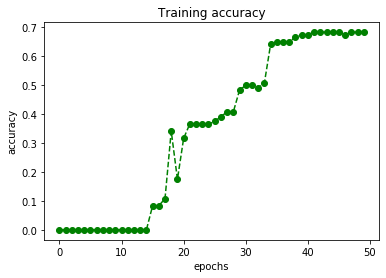

In [17]:
# Neural Network (NN) parameters
epochs=50
learning_rate=0.01
verbose=True
print_every_k=10
# Initialization of the NN
NN1 = MLP([4, 10, 3])
print('TRAINING')
# Training
NN1.training(x_train,y_train,learning_rate,epochs,verbose,print_every_k)
# Compute the training loss and accuracy after having completer the training
y_hat=NN1.forward(x_train)
print('final : loss = %.3e , accuracy = %.2f %%'%(MLP.loss(y_hat,y_train),100*MLP.accuracy(y_hat,y_train)))

# Test
print('\nTEST')
y_hat=NN1.forward(x_test)
print('loss = %.3e , accuracy = %.2f %%\n'%(MLP.loss(y_hat,y_test),100*MLP.accuracy(y_hat,y_test)))

plt.plot(list(range(epochs)),NN1.losses,c='r',marker='o',ls='--');
plt.title("Training Loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.show()

plt.plot(list(range(epochs)),NN1.accuracies,c='g',marker='o',ls='--');
plt.title("Training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

Using the previous cell as example, try to change the parameters in order to obtain a training accuracy above 99% and a test accuracy above 95%.

**Explain** the difference between the new parameters and the old ones. What was missing in the old ones?

TRAINING
Epoch 0 : loss = 2.32107e-01, accuracy = 68.33 %
Epoch 10 : loss = 1.15309e-01, accuracy = 76.67 %
Epoch 20 : loss = 1.03025e-01, accuracy = 84.17 %
Epoch 30 : loss = 3.90717e-02, accuracy = 95.83 %
Epoch 40 : loss = 5.17307e-02, accuracy = 91.67 %
Epoch 50 : loss = 3.43108e-02, accuracy = 95.83 %
Epoch 60 : loss = 2.50363e-02, accuracy = 96.67 %
Epoch 70 : loss = 2.39124e-02, accuracy = 95.83 %
Epoch 80 : loss = 1.57096e-02, accuracy = 100.00 %
Epoch 90 : loss = 2.10298e-02, accuracy = 97.50 %
Epoch 100 : loss = 6.32605e-02, accuracy = 91.67 %
Epoch 110 : loss = 2.99657e-02, accuracy = 95.00 %
final : loss = 1.261e-02 , accuracy = 99.17 %

TEST
loss = 5.195e-02 , accuracy = 93.33 %



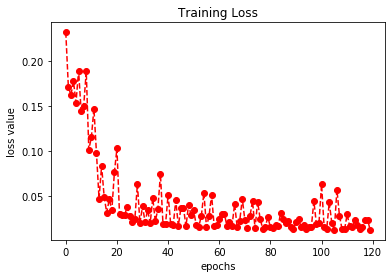

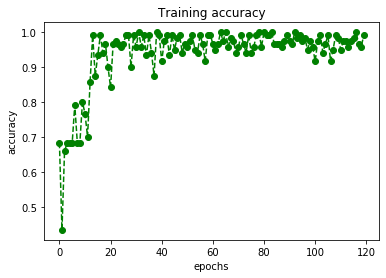

In [19]:
# Neural Network (NN) parameters
epochs=120 # See why below
learning_rate=0.4 # See why below
verbose=True
print_every_k=10
# Initialization of the NN
NN1 = MLP([4, 10, 3])
print('TRAINING')
# Training
NN1.training(x_train,y_train,learning_rate,epochs,verbose,print_every_k)
# Compute the training loss and accuracy after having completer the training
y_hat=NN1.forward(x_train)
print('final : loss = %.3e , accuracy = %.2f %%'%(MLP.loss(y_hat,y_train),100*MLP.accuracy(y_hat,y_train)))

# Test
print('\nTEST')
y_hat=NN1.forward(x_test)
print('loss = %.3e , accuracy = %.2f %%\n'%(MLP.loss(y_hat,y_test),100*MLP.accuracy(y_hat,y_test)))

plt.plot(list(range(epochs)),NN1.losses,c='r',marker='o',ls='--');
plt.title("Training Loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.show()

plt.plot(list(range(epochs)),NN1.accuracies,c='g',marker='o',ls='--');
plt.title("Training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

**Answer:**

 I changed the epochs parameters to 200 and the learning rate to 0.35 and I then wrote down the loss and accuracy of both the training set and the test set.
 
The results are in average :

TRAINING :

Loss of Training : 3,12 *10^-2

Accuracy of Training : 96,32 %


TEST :

Loss of Test : 1,66 *10^-2

Accuracy of Test : 99,33 %
    
    
INTERPRETATION :

As we can see the results are very satisfying even if we did not make the training accuracy above 99 %

By changing the epochs from 50 to 200 we changed the number of iterations of backpropagation we make. By doing so, the Loss funcion is improved for a longer time. This is usefull to make sure we make enough iterations to obtain a good result, even if the weights are randomly initialised

By changing the learning rate from 0,01 to 0,35 we made sure each iterations would be closer to the objective in a quicker way. We experimented randomly on the value of the learning rate in ordre to find the most pragmatic one



Having an epochs way too high would make the algorithm slower so we have to compromise

Having a learning rate too high or too low can make us miss the minimum of the loss by either changing the variable too much or not enough.
